In [2222]:
# 기본 모듈 호출
import pandas as pd
import numpy as np

## Data 확인

In [2223]:
# 데이터 불러오기
df = pd.read_excel('dataset_hw1.xlsx')

In [2224]:
# data 수 확인
df.shape

(1411, 13)

In [2225]:
# 데이터 확인 
df.head()

,movie_ID,title,genre,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,released_month,num_viewers
0,19820019,만추,멜로/로맨스,113.0,7.31,5175,8692,한국,15세이상관람가,씨제이엔터테인먼트,2011,2,844103
1,20050082,이터널 선샤인,멜로/로맨스,107.0,9.11,9388,812,미국,15세이상관람가,코리아픽쳐스(주),2005,11,506609
2,20061214,작은 연못,드라마,86.0,6.51,873,393,한국,15세이상관람가,NaN,2010,4,47160
3,20061223,소년은 울지 않는다,액션,98.0,5.62,266,352,한국,15세이상관람가,㈜스튜디오이쩜영,2008,11,94993
4,20068576,그날의 분위기,멜로/로맨스,103.0,6.53,3005,2953,한국,15세이상관람가,(주)쇼박스,2016,1,652453


In [2226]:
df.num_viewers.mean()

1074520.2005669738

In [2227]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_ID         1411 non-null   int64  
 1   title            1411 non-null   object 
 2   genre            1408 non-null   object 
 3   running_time     1409 non-null   float64
 4   netizen_ratings  1411 non-null   float64
 5   num_reviews      1411 non-null   int64  
 6   num_article      1411 non-null   int64  
 7   country          1409 non-null   object 
 8   rating           1410 non-null   object 
 9   companyNm        1406 non-null   object 
 10  released_year    1411 non-null   int64  
 11  released_month   1411 non-null   int64  
 12  num_viewers      1411 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 143.4+ KB


In [2228]:
df.describe()

,movie_ID,running_time,netizen_ratings,num_reviews,num_article,released_year,released_month,num_viewers
count,1.411000e+03,1409.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1.411000e+03
mean,2.012593e+07,110.545067,7.618731,4582.657690,1031.433026,2012.635719,6.406804,1.074520e+06
std,3.060055e+04,18.083797,1.111924,7316.325767,1866.725542,2.899102,3.465790,1.841526e+06
min,1.982002e+07,0.000000,2.530000,49.000000,0.000000,2005.000000,1.000000,2.260000e+04
25%,2.010038e+07,98.000000,7.010000,943.500000,38.000000,2010.000000,3.000000,1.079420e+05
50%,2.012641e+07,110.000000,7.800000,2175.000000,194.000000,2013.000000,7.000000,3.558510e+05
75%,2.015077e+07,121.000000,8.420000,5048.000000,1279.500000,2015.000000,9.000000,1.179833e+06
max,2.018766e+07,235.000000,9.380000,95111.000000,19996.000000,2018.000000,12.000000,1.761368e+07


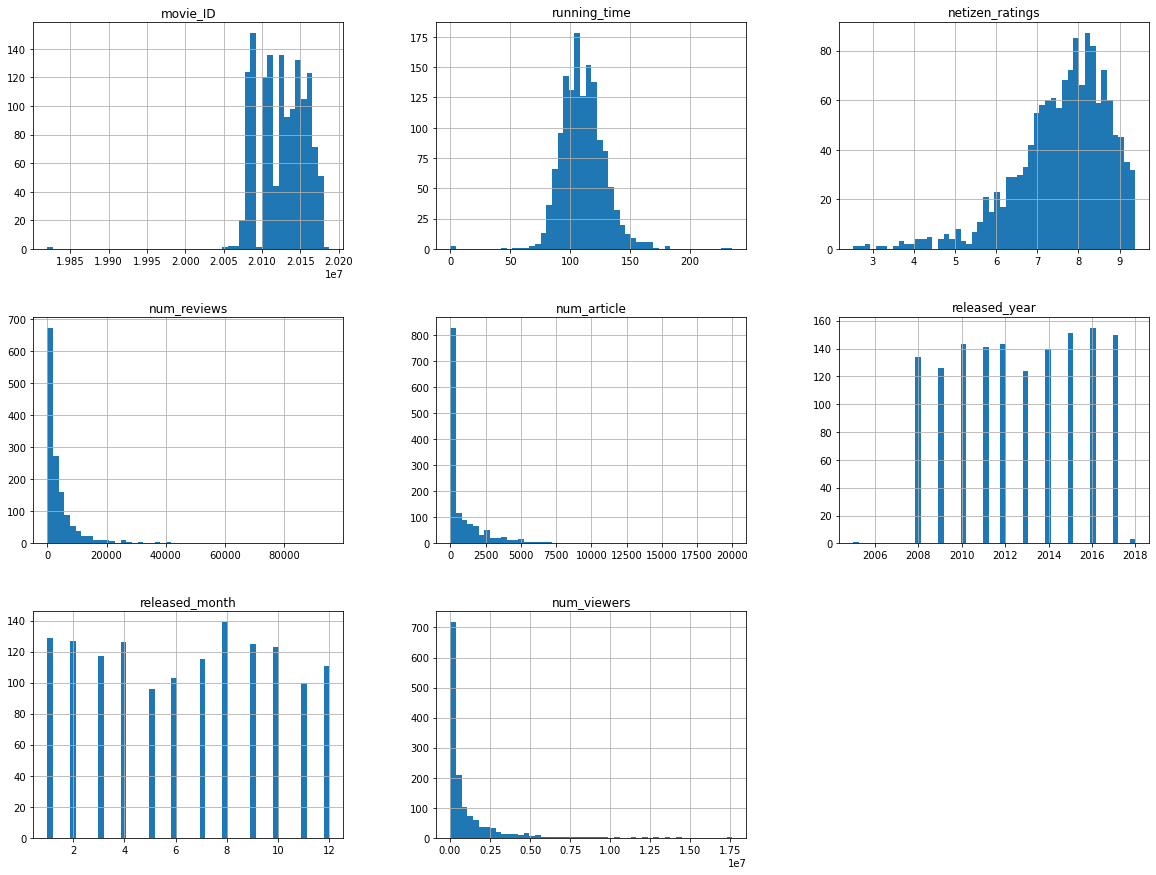

In [2229]:
# all of the numerical variables
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

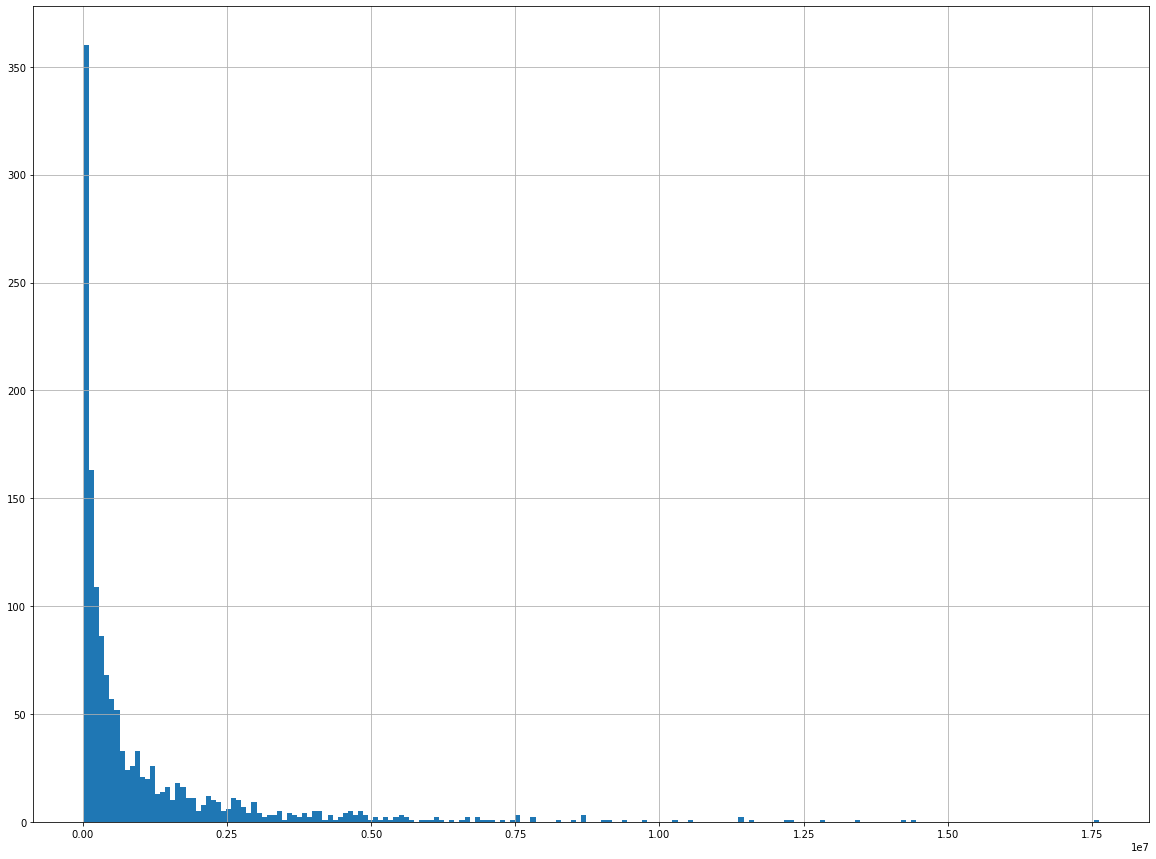

In [2230]:
df['num_viewers'].hist(bins=200, figsize=(20,15))
plt.show()

## Null 값 확인 및 제거

In [2231]:
# data null 값 확인
df.isnull().sum()

movie_ID           0
title              0
genre              3
running_time       2
netizen_ratings    0
num_reviews        0
num_article        0
country            2
rating             1
companyNm          5
released_year      0
released_month     0
num_viewers        0
dtype: int64

In [2232]:
df.notnull().sum()

movie_ID           1411
title              1411
genre              1408
running_time       1409
netizen_ratings    1411
num_reviews        1411
num_article        1411
country            1409
rating             1410
companyNm          1406
released_year      1411
released_month     1411
num_viewers        1411
dtype: int64

In [2233]:
# null 값 삭제
df = df.dropna()

In [2234]:
df.notnull().sum()

movie_ID           1400
title              1400
genre              1400
running_time       1400
netizen_ratings    1400
num_reviews        1400
num_article        1400
country            1400
rating             1400
companyNm          1400
released_year      1400
released_month     1400
num_viewers        1400
dtype: int64

### 범주형 변수 확인

In [2235]:
df.title.value_counts()

만추                  1
워터 디바이너             1
기생수 파트1             1
패딩턴                 1
빅 아이즈               1
                   ..
고 녀석 맛나겠다           1
바니버디                1
해리포터와 죽음의 성물2       1
명탐정 코난 : 침묵의 15분    1
마일22                1
Name: title, Length: 1400, dtype: int64

In [2236]:
# 범주형 변수 중 dummy화를 통해 분석에 사용하기 용이한 data 확인(unique값 확인)
print(f"title : {df['title'].nunique()}")
print(f"genre : {df['genre'].nunique()}")
print(f"country : {df['country'].nunique()}")
print(f"rating : {df['rating'].nunique()}")
print(f"companyNm : {df['companyNm'].nunique()}")
# 위 변수 중 title은 len()을 활용해 영화 제목 길이가 관람객 수에 유의미한 영향이 있는지 파악
# rating의 경우 dummy화를 통해 분석에 활용

title : 1400
genre : 18
country : 25
rating : 4
companyNm : 128


## 분석에 활용할 변수 생성

#### 월별 관람객 수

In [2237]:
# 월별 관람객 수 생성
df['viewers_per_months'] = round(df['num_viewers'] / df['released_month'])

#### 제목 길이 생성

In [2238]:
# title 제목의 길이 추출
title_len = []
for i in df['title']:
    title_len.append(len(i))

In [2239]:
# title 제목 길이 dataframe에 삽입
df['title_len'] = title_len

#### rating dummy화

In [2240]:
# rating 카테고리 확인
df.rating.value_counts()

15세이상관람가    535
12세이상관람가    361
청소년관람불가     267
전체관람가       237
Name: rating, dtype: int64

In [2241]:
# dummy 변수 생성
rating_dummies = pd.get_dummies(df[['rating']], prefix=['rating'])

In [2242]:
rating_dummies.head()

,rating_12세이상관람가,rating_15세이상관람가,rating_전체관람가,rating_청소년관람불가
0,0,1,0,0
1,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0


In [2243]:
# 기존 데이터와 합치기
df = df.join(rating_dummies)

In [2244]:
df.head()

,movie_ID,title,genre,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,released_month,num_viewers,viewers_per_months,title_len,rating_12세이상관람가,rating_15세이상관람가,rating_전체관람가,rating_청소년관람불가
0,19820019,만추,멜로/로맨스,113.0,7.31,5175,8692,한국,15세이상관람가,씨제이엔터테인먼트,2011,2,844103,422052.0,2,0,1,0,0
1,20050082,이터널 선샤인,멜로/로맨스,107.0,9.11,9388,812,미국,15세이상관람가,코리아픽쳐스(주),2005,11,506609,46055.0,7,0,1,0,0
3,20061223,소년은 울지 않는다,액션,98.0,5.62,266,352,한국,15세이상관람가,㈜스튜디오이쩜영,2008,11,94993,8636.0,10,0,1,0,0
4,20068576,그날의 분위기,멜로/로맨스,103.0,6.53,3005,2953,한국,15세이상관람가,(주)쇼박스,2016,1,652453,652453.0,7,0,1,0,0
5,20068590,인류멸망 보고서,SF,120.0,4.80,3888,1263,한국,15세이상관람가,타임스토리그룹(주),2012,4,97916,24479.0,8,0,1,0,0


In [2245]:
df.isna().sum()

movie_ID              0
title                 0
genre                 0
running_time          0
netizen_ratings       0
num_reviews           0
num_article           0
country               0
rating                0
companyNm             0
released_year         0
released_month        0
num_viewers           0
viewers_per_months    0
title_len             0
rating_12세이상관람가       0
rating_15세이상관람가       0
rating_전체관람가          0
rating_청소년관람불가        0
dtype: int64

In [2246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1410
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_ID            1400 non-null   int64  
 1   title               1400 non-null   object 
 2   genre               1400 non-null   object 
 3   running_time        1400 non-null   float64
 4   netizen_ratings     1400 non-null   float64
 5   num_reviews         1400 non-null   int64  
 6   num_article         1400 non-null   int64  
 7   country             1400 non-null   object 
 8   rating              1400 non-null   object 
 9   companyNm           1400 non-null   object 
 10  released_year       1400 non-null   int64  
 11  released_month      1400 non-null   int64  
 12  num_viewers         1400 non-null   int64  
 13  viewers_per_months  1400 non-null   float64
 14  title_len           1400 non-null   int64  
 15  rating_12세이상관람가     1400 non-null   uint8  
 16  rating

In [2247]:
df.shape

(1400, 19)

In [2248]:
df1 = df.corr(method='pearson')

In [2249]:
df1[df1['num_viewers'] > 0.3]

,movie_ID,running_time,netizen_ratings,num_reviews,num_article,released_year,released_month,num_viewers,viewers_per_months,title_len,rating_12세이상관람가,rating_15세이상관람가,rating_전체관람가,rating_청소년관람불가
running_time,0.041548,1.000000,0.168827,0.322259,0.244931,0.059381,-0.059783,0.313713,0.169641,-0.066034,0.184367,0.050964,-0.343692,0.059739
num_reviews,0.092717,0.322259,0.188733,1.000000,0.616809,0.139845,0.056515,0.842505,0.489601,-0.130622,0.122700,0.051389,-0.134650,-0.071658
num_article,0.069819,0.244931,0.043071,0.616809,1.000000,0.157518,0.053183,0.601084,0.306817,-0.254182,0.023870,0.078073,-0.194887,0.062884
num_viewers,0.030946,0.313713,0.212586,0.842505,0.601084,0.067321,0.044378,1.000000,0.616365,-0.070671,0.118395,0.035130,-0.075483,-0.103231
viewers_per_months,-0.002514,0.169641,0.156487,0.489601,0.306817,0.049394,-0.274188,0.616365,1.000000,-0.047146,0.017878,0.037763,0.002200,-0.068713


In [2250]:
y_labels = df["num_viewers"].copy() # 종속변수 y_label 생성
X = df.drop("num_viewers", axis=1) # training set에서 종속변수 제거
X = X.drop(["title", "genre", "country", "companyNm"], axis=1)# 사용하지 않는 범주형 변수 제거
X = X.drop(["movie_ID", 'netizen_ratings',"released_year", "title_len"], axis=1)# 상관계수 0.3 미만인 연속형 변수 제거
X = X.drop(["rating_전체관람가", "rating"], axis=1) #더미화시킨 rating 제거, 전체관람가를 기준으로 잡기 위해 제거

In [2251]:
X.head()

,running_time,num_reviews,num_article,released_month,viewers_per_months,rating_12세이상관람가,rating_15세이상관람가,rating_청소년관람불가
0,113.0,5175,8692,2,422052.0,0,1,0
1,107.0,9388,812,11,46055.0,0,1,0
3,98.0,266,352,11,8636.0,0,1,0
4,103.0,3005,2953,1,652453.0,0,1,0
5,120.0,3888,1263,4,24479.0,0,1,0


In [2252]:
y_labels.shape

(1400,)

In [2253]:
X.shape

(1400, 8)

### train, test data 분류

In [2254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)

In [2255]:
X_test.shape

(280, 8)

### 정규화


#### standard Scaler 활용

In [2256]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2257]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#### Min-max scaler 활용

In [2258]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

In [2259]:
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

### 회귀 모델 활용(정규화, 비정규화간 정확도 비교)

In [2260]:
from sklearn.linear_model import LinearRegression
# 비정규화
model = LinearRegression()
model.fit(X_train, y_train)
print(f'비정규화 : {model.score(X_test, y_test)}')
print('=' * 40)


# 정규화(standard scaler)
model_std = LinearRegression()
model_std.fit(X_train_std, y_train)
print(f'standard : {model_std.score(X_test_std, y_test)}')
print('=' * 40)


# 정규화(min-max)
model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train)
print(f'min-max : {model_minmax.score(X_test_minmax, y_test)}')
print('=' * 40)



비정규화 : 0.8505673217161674
standard : 0.8505673217161879
min-max : 0.8505673217161878


In [2278]:
# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Linear Regression : {model.score(X_test, y_test) * 100 :0.4f}%')
print('=' * 40)

# lasso
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_train, y_train)
print(f'Lasso : {model_lasso.score(X_test, y_test) * 100 :0.4f} %')
print('=' * 40)

# ridge
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train, y_train)
print(f'Ridge : {model_ridge.score(X_test, y_test) * 100:0.4f} %')
print('=' * 40)

import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
print(f'XGB Regressor : {model_xgb.score(X_test, y_test) * 100:0.4f} %')
print('=' * 40)

import lightgbm as lgb
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train, y_train)
print(f'LGBM Regressor : {model_lgb.score(X_test,y_test) * 100:0.4f} %')
print('=' * 40)

Linear Regression : 85.0567%
Lasso : 85.0567 %
Ridge : 85.0555 %
XGB Regressor : 93.2090 %
LGBM Regressor : 91.9846 %


In [2273]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train, y_train)
model_lgb.score(X_test,y_test)

0.9198458422309027

In [2268]:
model.coef_

array([ 6.06723274e+03,  1.49199382e+02,  1.20350495e+02,  4.66322972e+04,
        7.50797354e-01, -1.37342744e+05, -2.33076496e+05, -3.76042640e+05])